<a href="https://colab.research.google.com/github/Lakshmithilak/Classification-project/blob/main/Activity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import glob

In [2]:
#@title Code for Data Statistics and Feature Extraction
def feat_label_per_subject_per_activity_per_locomotion(path, subject, activity, label_val, feat_st, feat_ed):
  full_feat = []
  full_label = []
  df = pd.read_csv(os.path.join(path, subject+'-'+activity+'.dat'), header=None, delim_whitespace=True)
  df=df.to_numpy()
  feat=df[:, feat_st:feat_ed]
  feat=np.nan_to_num(feat)
  label=df[:, 114]
  label=np.nan_to_num(label)
  label[label == 101] = 1
  label[label == 102] = 2
  label[label == 104] = 3
  label[label == 105] = 4
  for i in range(0, df.shape[0]):
    if label[i] == label_val:
      full_feat.append(feat[i])
      full_label.append(label[i])
  full_feat = np.array(full_feat)
  full_label = np.array(full_label)
  return full_feat, full_label


def feat_label_per_subject_per_activity(path, subject, activity, label_list, instance_num, feat_st, feat_ed):
  full_feat = np.empty((0,feat_ed-feat_st))
  full_label = np.empty((0,))
  for i in range(len(label_list)):
    X, y = feat_label_per_subject_per_activity_per_locomotion(path, subject, activity, label_list[i], feat_st, feat_ed)
    full_feat = np.append(full_feat, X[:instance_num, :,], axis=0)
    full_label = np.append(full_label, y[:instance_num], axis=0)
  full_feat = np.array(full_feat)
  full_label = np.array(full_label)
  return full_feat, full_label

def full_feat_label_per_subject_per_activity(path, subject, activity, label_list, feat_st, feat_ed):
  full_feat = np.empty((0,feat_ed-feat_st))
  full_label = np.empty((0,))
  for i in range(len(label_list)):
    X, y = feat_label_per_subject_per_activity_per_locomotion(path, subject, activity, label_list[i], feat_st, feat_ed)
    full_feat = np.append(full_feat, X, axis=0)
    full_label = np.append(full_label, y, axis=0)
  full_feat = np.array(full_feat)
  full_label = np.array(full_label)
  return full_feat, full_label


def feat_label_per_subject(path, subject, label_list, instance_num, activity_list, feat_st, feat_ed):
  full_feat = np.empty((0,feat_ed-feat_st))
  full_label = np.empty((0,))
  for i in range(len(activity_list)):
    X, y = feat_label_per_subject_per_activity(path, subject, activity_list[i], label_list, instance_num, feat_st, feat_ed)
    full_feat = np.append(full_feat, X, axis=0)
    full_label = np.append(full_label, y, axis=0)
  full_feat = np.array(full_feat)
  full_label = np.array(full_label)
  return full_feat, full_label

def full_feat_label_per_subject(path, subject, label_list, activity_list, feat_st, feat_ed):
  full_feat = np.empty((0,feat_ed-feat_st))
  full_label = np.empty((0,))
  for i in range(len(activity_list)):
    X, y = full_feat_label_per_subject_per_activity(path, subject, activity_list[i], label_list, feat_st, feat_ed)
    full_feat = np.append(full_feat, X, axis=0)
    full_label = np.append(full_label, y, axis=0)
  full_feat = np.array(full_feat)
  full_label = np.array(full_label)
  return full_feat, full_label

def full_feat_label_per_activity(path, subject_list, label_list, activity, feat_st, feat_ed):
  full_feat = np.empty((0,feat_ed-feat_st))
  full_label = np.empty((0,))
  for i in range(len(subject_list)):
    X, y = full_feat_label_per_subject_per_activity(path, subject_list[i], activity, label_list, feat_st, feat_ed)
    full_feat = np.append(full_feat, X, axis=0)
    full_label = np.append(full_label, y, axis=0)
  full_feat = np.array(full_feat)
  full_label = np.array(full_label)
  return full_feat, full_label

def feat_label(path, subject_list, label_list, instance_num, activity_list, feat_st, feat_ed):
  full_feat = np.empty((0,feat_ed-feat_st))
  full_label = np.empty((0,))
  for i in range(len(subject_list)):
    X, y = feat_label_per_subject(path, subject_list[i], label_list, instance_num, activity_list, feat_st, feat_ed)
    full_feat = np.append(full_feat, X, axis=0)
    full_label = np.append(full_label, y, axis=0)
  full_feat = np.array(full_feat)
  full_label = np.array(full_label)
  return full_feat, full_label

def full_feat_label(path, subject_list, label_list, activity_list, feat_st, feat_ed):
  full_feat = np.empty((0,feat_ed-feat_st))
  full_label = np.empty((0,))
  for i in range(len(subject_list)):
    X, y = full_feat_label_per_subject(path, subject_list[i], label_list, activity_list, feat_st, feat_ed)
    full_feat = np.append(full_feat, X, axis=0)
    full_label = np.append(full_label, y, axis=0)
  full_feat = np.array(full_feat)
  full_label = np.array(full_label)
  return full_feat, full_label

In [3]:
path = "/content"

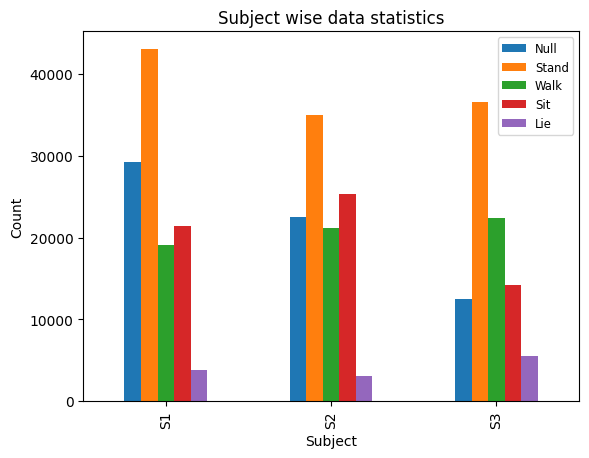

In [4]:
#@title Data Statistics - Subject wise stats
xs1, ys1 = full_feat_label_per_subject(path, 'S1', [0,1,2,3,4], ['ADL1','ADL2','ADL3'], 1, 114)
xs2, ys2 = full_feat_label_per_subject(path, 'S2', [0,1,2,3,4], ['ADL1','ADL2','ADL3'], 1, 114)
xs3, ys3 = full_feat_label_per_subject(path, 'S3', [0,1,2,3,4], ['ADL1','ADL2','ADL3'], 1, 114)
df3 = pd.DataFrame(ys1, columns=['label'])
stats1 = {'Null': len(df3[df3["label"] == 0.0]), 'Stand': len(df3[df3["label"] == 1.0]), 'Walk': len(df3[df3["label"] == 2.0]), 'Sit': len(df3[df3["label"] == 3.0]), 'Lie': len(df3[df3["label"] == 4.0])}
stats1 = pd.DataFrame(stats1, index=['S1'])

df4 = pd.DataFrame(ys2, columns=['label'])
stats2 = {'Null': len(df4[df4["label"] == 0.0]), 'Stand': len(df4[df4["label"] == 1.0]), 'Walk': len(df4[df4["label"] == 2.0]), 'Sit': len(df4[df4["label"] == 3.0]), 'Lie': len(df4[df4["label"] == 4.0])}
stats2 = pd.DataFrame(stats2, index=['S2'])

df5 = pd.DataFrame(ys3, columns=['label'])
stats3 = {'Null': len(df5[df5["label"] == 0.0]), 'Stand': len(df5[df5["label"] == 1.0]), 'Walk': len(df5[df5["label"] == 2.0]), 'Sit': len(df5[df5["label"] == 3.0]), 'Lie': len(df5[df5["label"] == 4.0])}
stats3 = pd.DataFrame(stats3, index=['S3'])

stat = pd.concat([stats1, stats2, stats3], axis=0)
stat.plot.bar(xlabel='Subject', ylabel='Count', title='Subject wise data statistics').legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)

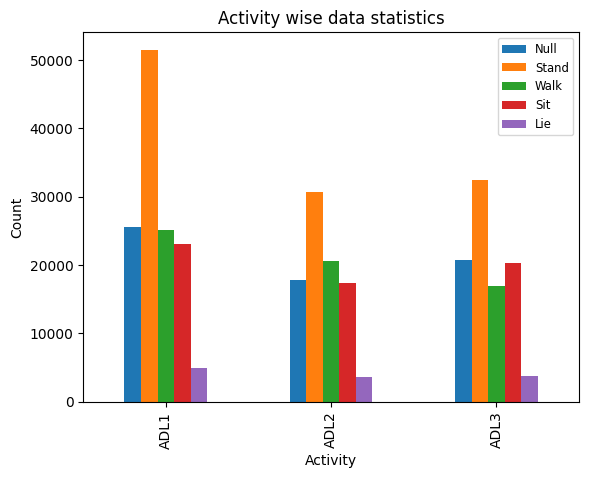

In [5]:
#@title Data Statistics - Activity wise stats
xa1, ya1 = full_feat_label_per_activity(path, ['S1', 'S2', 'S3'], [0,1,2,3,4], 'ADL1', 1, 114)
xa2, ya2 = full_feat_label_per_activity(path, ['S1', 'S2', 'S3'], [0,1,2,3,4], 'ADL2', 1, 114)
xa3, ya3 = full_feat_label_per_activity(path, ['S1', 'S2', 'S3'], [0,1,2,3,4], 'ADL3', 1, 114)

df3 = pd.DataFrame(ya1, columns=['label'])
stats1 = {'Null': len(df3[df3["label"] == 0.0]), 'Stand': len(df3[df3["label"] == 1.0]), 'Walk': len(df3[df3["label"] == 2.0]), 'Sit': len(df3[df3["label"] == 3.0]), 'Lie': len(df3[df3["label"] == 4.0])}
stats1 = pd.DataFrame(stats1, index=['ADL1'])

df4 = pd.DataFrame(ya2, columns=['label'])
stats2 = {'Null': len(df4[df4["label"] == 0.0]), 'Stand': len(df4[df4["label"] == 1.0]), 'Walk': len(df4[df4["label"] == 2.0]), 'Sit': len(df4[df4["label"] == 3.0]), 'Lie': len(df4[df4["label"] == 4.0])}
stats2 = pd.DataFrame(stats2, index=['ADL2'])

df5 = pd.DataFrame(ya3, columns=['label'])
stats3 = {'Null': len(df5[df5["label"] == 0.0]), 'Stand': len(df5[df5["label"] == 1.0]), 'Walk': len(df5[df5["label"] == 2.0]), 'Sit': len(df5[df5["label"] == 3.0]), 'Lie': len(df5[df5["label"] == 4.0])}
stats3 = pd.DataFrame(stats3, index=['ADL3'])

stat = pd.concat([stats1, stats2, stats3], axis=0)
stat.plot.bar(xlabel='Activity', ylabel='Count', title='Activity wise data statistics').legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)

In [6]:
#@title Train and Test data - Feature extraction
X_train, y_train = feat_label(path, ['S1','S2','S3'], [0,1,2,3,4], 200, ['ADL1','ADL2','ADL3'], 1, 114)
print('Training feature size: ', X_train.shape)
print('Training label size: ', y_train.shape)

X_test, y_test = feat_label(path, ['S1','S2','S3'], [0,1,2,3,4], 200, ['ADL4','ADL5'], 1, 114)
print('Testing feature size: ', X_test.shape)
print('Testing label size: ', y_test.shape)

Training feature size:  (9000, 113)
Training label size:  (9000,)
Testing feature size:  (6000, 113)
Testing label size:  (6000,)


In [ ]:
#@title Feature extraction with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=50, svd_solver='auto')

X_train, y_train = feat_label(path, ['S1','S2','S3'], [0,1,2,3,4], 200, ['ADL1','ADL2','ADL3'])
pca.fit(X_train)
X_train = pca.transform(X_train)
print('Training feature size: ', X_train.shape)
print('Training label size: ', y_train.shape)

X_test, y_test = feat_label(path, ['S1','S2','S3'], [0,1,2,3,4], 200, ['ADL4','ADL5'])
pca.fit(X_test)
X_test = pca.transform(X_test)
print('Testing feature size: ', X_test.shape)
print('Testing label size: ', y_test.shape)

Accuracy: 0.8405
Precision: 0.8420033891907489
Recall: 0.8405
F-score: 0.8399366433746427
              precision    recall  f1-score   support

        Null       0.88      0.90      0.89      1200
       Stand       0.71      0.62      0.66      1200
        Walk       0.70      0.80      0.75      1200
         Sit       0.93      0.94      0.93      1200
         Lie       1.00      0.96      0.98      1200

    accuracy                           0.84      6000
   macro avg       0.84      0.84      0.84      6000
weighted avg       0.84      0.84      0.84      6000



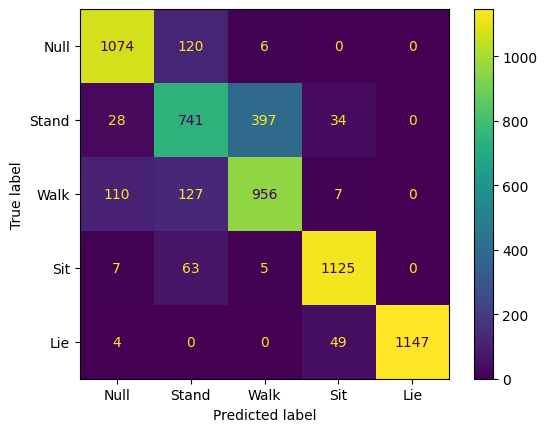

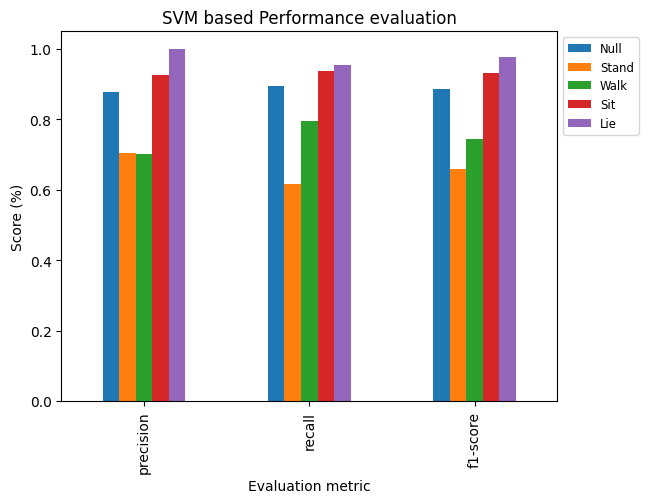

In [7]:
#@title Support Vector Machine - Training and evaluation
from sklearn.svm import SVC
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(x5, y5, test_size=0.3,random_state=109) # 70% training and 30% test

clf = SVC(kernel='rbf') # RBF Kernel
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from matplotlib.pyplot import plot as plt

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))

# Model F-score:
print("F-score:",metrics.f1_score(y_test, y_pred, average='weighted'))

# Print Classification report
from sklearn.metrics import classification_report
target_names = ['Null', 'Stand', 'Walk', 'Sit', 'Lie']
report_svm = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
report_svm_table = classification_report(y_test, y_pred, target_names=target_names, output_dict=False)
print(report_svm_table)

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = target_names)

cm_display.plot()

import pandas as pd
df = pd.DataFrame(report_svm)
df=df.drop('support')
#print(df.head())
class_wise_metric_svm = df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=1)
overall_metric_svm = df.drop(['Null', 'Stand', 'Walk', 'Sit', 'Lie', 'accuracy', 'macro avg'], axis=1)
class_wise_metric_svm.plot.bar(xlabel='Evaluation metric', ylabel='Score (%)', title='SVM based Performance evaluation').legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)
#overall_metric_svm.plot.bar()

In [8]:
#@title k Nearest Neighbor - Training to find optimal 'k'
from sklearn.neighbors import KNeighborsClassifier
k = 20
metric_array = np.zeros((k-1))
for n in range(1,k):
  print(n)
  model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
  y_hat = model.predict(X_test)
  metric_array[n-1]=metrics.accuracy_score(y_test, y_hat)

print(metric_array)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[0.80233333 0.78616667 0.8065     0.7985     0.80733333 0.80366667
 0.81466667 0.809      0.8385     0.83366667 0.84283333 0.83766667
 0.84616667 0.84133333 0.84866667 0.84616667 0.851      0.85
 0.85483333]


Accuracy: 0.8548333333333333
Precision: 0.865011590195307
Recall: 0.8548333333333333
F-score: 0.8551750988882884
              precision    recall  f1-score   support

        Null       0.79      0.94      0.85      1200
       Stand       0.70      0.80      0.74      1200
        Walk       0.86      0.67      0.76      1200
         Sit       0.98      0.89      0.93      1200
         Lie       1.00      0.98      0.99      1200

    accuracy                           0.85      6000
   macro avg       0.87      0.85      0.86      6000
weighted avg       0.87      0.85      0.86      6000



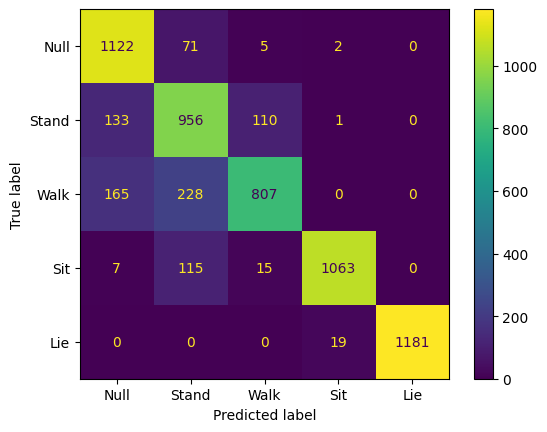

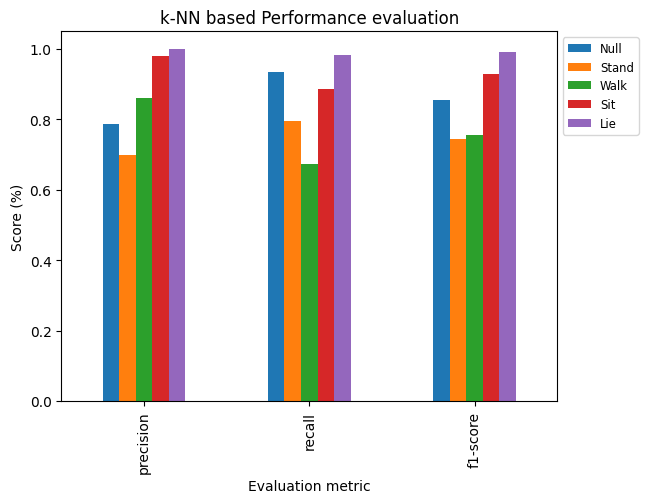

In [10]:
#@title k-NN Training and Evaluation
k = 19
model_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
y_hat = model_knn.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_hat))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_hat, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_hat, average='weighted'))

# Model F-score:
print("F-score:",metrics.f1_score(y_test, y_hat, average='weighted'))

# Print Classification report
from sklearn.metrics import classification_report
target_names = ['Null', 'Stand', 'Walk', 'Sit', 'Lie']
report_knn = classification_report(y_test, y_hat, target_names=target_names, output_dict=True)
report_knn_table = classification_report(y_test, y_hat, target_names=target_names, output_dict=False)
print(report_knn_table)

confusion_matrix = metrics.confusion_matrix(y_test,y_hat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = target_names)

cm_display.plot()

import pandas as pd
df = pd.DataFrame(report_knn)
df=df.drop('support')
df.head()
class_wise_metric_knn = df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=1)
overall_metric_knn = df.drop(['Null', 'Stand', 'Walk', 'Sit', 'Lie', 'accuracy', 'macro avg'], axis=1)
class_wise_metric_knn.plot.bar(xlabel='Evaluation metric', ylabel='Score (%)', title='k-NN based Performance evaluation').legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)
#overall_metric_knn.plot.bar()

Accuracy: 0.7108333333333333
Precision: 0.7277419249683017
Recall: 0.7108333333333333
F-score: 0.7017688010082869
              precision    recall  f1-score   support

        Null       0.92      0.90      0.91      1200
       Stand       0.48      0.24      0.32      1200
        Walk       0.48      0.78      0.59      1200
         Sit       0.80      0.85      0.83      1200
         Lie       0.96      0.78      0.86      1200

    accuracy                           0.71      6000
   macro avg       0.73      0.71      0.70      6000
weighted avg       0.73      0.71      0.70      6000



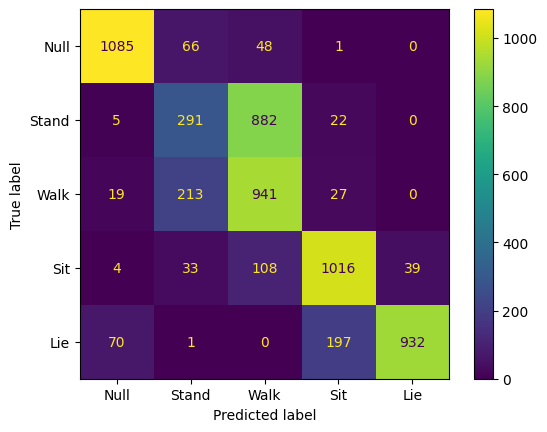

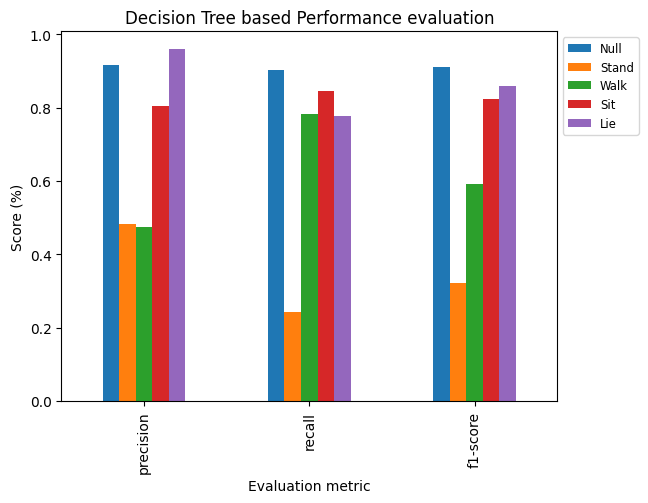

In [11]:
#@title Decision Tree based Training and Evaluation
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=8).fit(X_train,y_train)
y_hat = model_dt.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_hat))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_hat, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_hat, average='weighted'))

# Model F-score:
print("F-score:",metrics.f1_score(y_test, y_hat, average='weighted'))

# Print Classification report
from sklearn.metrics import classification_report
target_names = ['Null', 'Stand', 'Walk', 'Sit', 'Lie']
report_dt = classification_report(y_test, y_hat, target_names=target_names, output_dict=True)
report_dt_table = classification_report(y_test, y_hat, target_names=target_names, output_dict=False)
print(report_dt_table)

confusion_matrix = metrics.confusion_matrix(y_test,y_hat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = target_names)

cm_display.plot()

import pandas as pd
df = pd.DataFrame(report_dt)
df=df.drop('support')
df.head()
class_wise_metric_dt = df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=1)
overall_metric_dt = df.drop(['Null', 'Stand', 'Walk', 'Sit', 'Lie', 'accuracy', 'macro avg'], axis=1)
class_wise_metric_dt.plot.bar(xlabel='Evaluation metric', ylabel='Score (%)', title='Decision Tree based Performance evaluation').legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)
#overall_metric_dt.plot.bar()

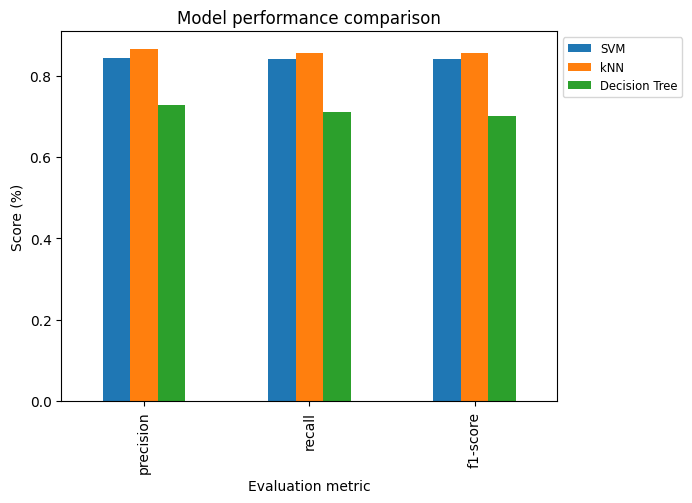

In [12]:
#@title Evaluation - Model Comparison
result = pd.concat([overall_metric_svm, overall_metric_knn, overall_metric_dt], axis=1)
result.columns = ['SVM', 'kNN', 'Decision Tree']
result.plot.bar(xlabel='Evaluation metric', ylabel='Score (%)', title='Model performance comparison').legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)